In [1]:
import pandas as pd 
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode
import itertools
import missingno as msno
import seaborn as sns
import plotly 
import chart_studio.plotly as py
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly.graph_objs as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
init_notebook_mode(connected=True)
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv(r'C:\Users\capnp\Desktop\Projects\Data Science\netflix\netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


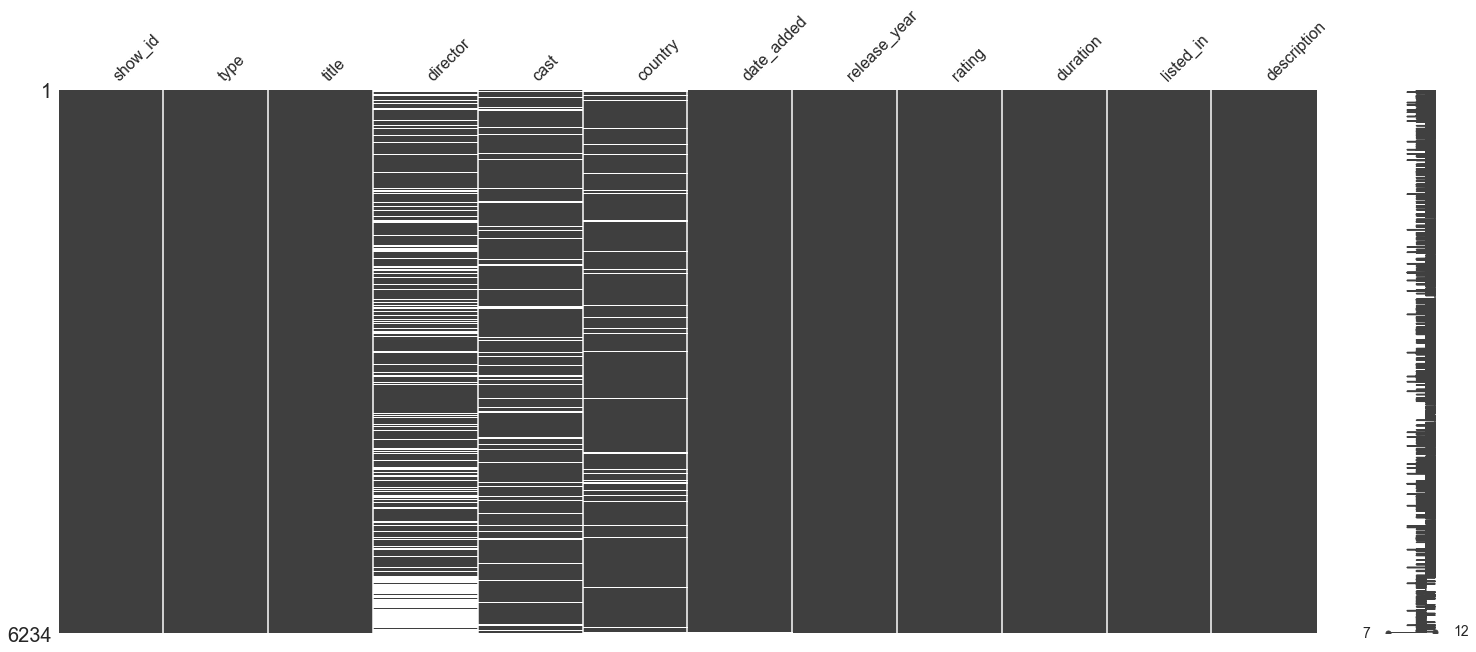

In [3]:
msno.matrix(df)
plt.show()

# Content Type
- Descrive the percentages of TV shows and Movies on Netflix  

In [4]:
movies = len(df[(df['type'] == 'Movie')])
tvShows = len(df[(df['type'] == 'TV Show')])

groups = ['Movies', 'TV Shows']
amount = [movies, tvShows]

trace = go.Pie(labels = groups,
               values = amount,
               hoverinfo = 'label+percent',
               marker = dict(
                   colors = ['lightblue', 'cyan'],
                   line = dict(
                       color = '#000000',
                       width = 2
                   ) 
               ))

layout = go.Layout(title = 'Type of Content on Netflix',
                   plot_bgcolor ='rgb(230, 230, 230)',
                   showlegend=True)
fig = go.Figure(data = [trace],
                layout = layout)
iplot(fig)

# Growth of netflix over the years
- Lets see how many Tv Shows and Movies were added over the years
- We will see only after the year 2007 because the online streaming service bgan from 2007 

In [5]:
x = df['release_year'].value_counts().rename_axis('release_year').reset_index(name='counts')
x = x[x['release_year'] > 2006]

y = df['release_year'].value_counts().rename_axis('release_year').reset_index(name='counts')
beforehand = y[y['release_year'] <= 2006]
before = beforehand['counts'].sum()
print('So, Netflix had a total of', before, 'shows and movies before streaming online.')

So, Netflix had a total of 705 shows and movies before streaming online.


In [6]:
fig = go.Figure()

fig.add_trace(go.Bar(x = x['release_year'],
                         y = x['counts'],
                         name = 'No. of Content added'))
fig.update_layout(title='Titles added in Netflix after 2007',
                   xaxis_title='Year',
                   yaxis_title='Number of titles',
                   width=1500, height = 700)
fig.show()

In [7]:
movies = df[df['type'] == 'Movie']
tv = df[df['type'] == 'TV Show']
movies_temp = movies['release_year'].value_counts().rename_axis('release_year').reset_index(name='counts')
movies_temp = movies_temp[movies_temp['release_year'] > 2006]
movies_temp = movies_temp.sort_values('release_year')
tv_temp = tv['release_year'].value_counts().rename_axis('release_year').reset_index(name='counts')
tv_temp = tv_temp[tv_temp['release_year'] > 2006]
tv_temp = tv_temp.sort_values('release_year')

fig = go.Figure()
fig.add_trace(go.Scatter(x = movies_temp['release_year'],
                         y = movies_temp['counts'],
                         mode = 'lines+markers',
                         name = 'Movies'))
fig.add_trace(go.Scatter(x = tv_temp['release_year'],
                         y = tv_temp['counts'],
                         mode = 'lines+markers',
                         name = 'TV Shows'))   
fig.update_layout(title='Titles added in Netflix after 2007',
                   xaxis_title='Year',
                   yaxis_title='Number of titles',
                   width=1500, height = 700)                    
fig.show()               

# Word Cloud 
- Let's Take a look at the most common words used in the titles.

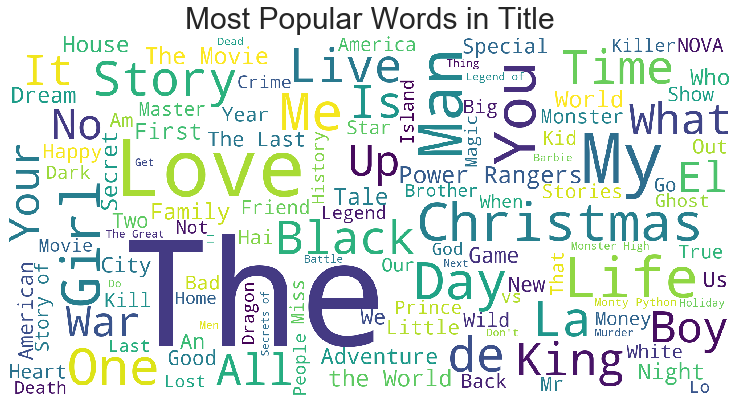

In [8]:
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'white', width = 2000,  height = 1000, max_words = 121).generate(' '.join(df['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Title',fontsize = 30)
plt.show()

# Which country produces the most content on Netflix?

In [9]:
countries = ", ".join(df['country'].dropna()).split(', ')
counter_dict = Counter(countries)
count_df = pd.DataFrame(counter_dict.items(), columns=['country', 'count'])
count_df = count_df.sort_values('count', ascending=False)
count_df = count_df[:20]
fig = go.Figure() 

fig.add_trace(go.Bar(x = count_df['country'],
                     y = count_df['count'],
                     name = 'Countrywise Content'
))

fig.update_layout(title='Countrywise content in Netflix',
                  xaxis_title='Year',
                  yaxis_title='Number of titles',
                  width=1000, height = 400)

fig.show()

In [10]:
country_codes = pd.read_csv(r'C:\Users\capnp\Desktop\Projects\Data Science\netflix\country_codes.csv')
count_df = pd.merge(left=country_codes, right=count_df, left_on='COUNTRY', right_on='country')  

In [11]:
fig = go.Figure(go.Choropleth(
    locations=count_df['CODE'],
    z = count_df['count'],
    text = count_df['COUNTRY'],
    colorscale = 'Reds',
    autocolorscale=True,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Movies/TV Shows'
))

fig.update_layout(
    title_text='Netflix Content over the world',
    geo=dict(
        showframe=True,
        showcoastlines=True,
        projection_type='equirectangular',
        ),
        height = 700,
        width = 1500)

fig.show()

# Who are the most famous actors/actresses on Netflix?

In [12]:
famous = ", ".join(df['cast'].dropna()).split(', ')
famous_dict = Counter(famous)
famous_df = pd.DataFrame(famous_dict.items(), columns=['cast', 'count'])
famous_df = famous_df.sort_values('count', ascending=False)
famous_df = famous_df[:20]

fig = go.Figure() 

fig.add_trace(go.Bar(x = famous_df['cast'],
                     y = famous_df['count'],
                     name = 'Countrywise Content'
))

fig.update_layout(title='Most famous actors/actresses on Netflix',
                  xaxis_title='Name',
                  yaxis_title='Number of titles',
                  width=1000, height = 400)

fig.show()

### 10 out of the top 20 Actors/Actresses in Netflix are Indians!

# Lets figure out the Genre Types

In [13]:
movies_genre = ', '.join(movies['listed_in'].dropna()).split(', ')
movies_genre_dict = Counter(movies_genre)
movies_genre_df = pd.DataFrame(movies_genre_dict.items(), columns=['genre', 'count'])

groups = movies_genre_df['genre']
amount = movies_genre_df['count']

trace = go.Pie(labels = groups,
               values = amount,
               hoverinfo = 'label+percent',
               marker = dict(
                   colors = ['lightblue', 'cyan'],
                   line = dict(
                       color = '#000000',
                       width = 2
                   ) 
               ))

layout = go.Layout(title = 'Movie Genres on Netflix',
                   plot_bgcolor ='rgb(230, 230, 230)',
                   showlegend=True)
fig = go.Figure(data = [trace],
                layout = layout)
iplot(fig)

In [14]:
tv_genre = ', '.join(tv['listed_in'].dropna()).split(', ')
tv_genre_dict = Counter(tv_genre)
tv_genre_df = pd.DataFrame(tv_genre_dict.items(), columns=['genre', 'count'])

groups = tv_genre_df['genre']
amount = tv_genre_df['count']

trace = go.Pie(labels = groups,
               values = amount,
               hoverinfo = 'label+percent',
               marker = dict(
                   colors = ['lightblue', 'cyan'],
                   line = dict(
                       color = '#000000',
                       width = 2
                   ) 
               ))

layout = go.Layout(title = 'TV Genres on Netflix',
                   plot_bgcolor ='rgb(230, 230, 230)',
                   showlegend=True)
fig = go.Figure(data = [trace],
                layout = layout)
iplot(fig)

# What is the average Runtime for a Movie on Netflix?

In [15]:
import plotly.figure_factory as ff 
movies_runtime =  movies
movies_runtime['duration'] = movies_runtime['duration'].str.split(" ", expand = True)[0]   
movies_runtime['duration'] = movies_runtime['duration'].astype(float)         

fig = ff.create_distplot([movies_runtime['duration']], ['Duration'], bin_size=0.5, curve_type='normal')
fig.update_layout(title_text='Movie Duration on Netflix',
                  height = 400,
                  width = 1000)
fig.show()

# Average Seasons of a TV show on Netflix

In [16]:
tv['duration'] = tv['duration'].str.extract('(\d+)').astype(int)
season_counts = tv['duration'].value_counts().rename_axis('seasons').reset_index(name='counts')

In [17]:
groups = season_counts['seasons']
amount = season_counts['counts']

trace = go.Pie(labels = groups,
               values = amount,
               hoverinfo = 'label+percent',
               marker = dict(
                   colors = ['lightblue', 'cyan'],
                   line = dict(
                       color = '#000000',
                       width = 2
                   ) 
               ))

layout = go.Layout(title = 'TV Seasons on Netflix',
                   plot_bgcolor ='rgb(230, 230, 230)',
                   showlegend=True)
fig = go.Figure(data = [trace],
                layout = layout)
iplot(fig)

# Which are the longest run shows on Netflix?

In [18]:
tv.sort_values(by='duration', inplace=True, ascending=False)

fig = go.Figure() 

fig.add_trace(go.Bar(x = tv['title'][:30],
                     y = tv['duration'][:30],
                     name = 'Top 30 Longest Run shows on Netflix'
))

fig.update_layout(title='Top 30 Longest Run shows on Netflix',
                  xaxis_title='Show',
                  yaxis_title='Number of Seasons',
                  width=1400, height = 400)

fig.show()

# Which Directors are more prevalent on Netflix?

In [19]:
directors = df[df['director'].notnull()]
dir_list = ', '.join(directors['director']).split(', ')
dir_dict = Counter(dir_list)
directors = pd.DataFrame(dir_dict.items(), columns=['directors', 'count'])
directors.sort_values(by='count', inplace = True, ascending = False)
directors.reset_index(drop=True, inplace=True)
directors.head(20)

,directors,count
0,Jan Suter,21
1,Raúl Campos,19
2,Jay Karas,14
3,Marcus Raboy,14
4,Jay Chapman,12
5,Steven Spielberg,9
6,Martin Scorsese,9
7,Lance Bangs,8
8,Johnnie To,8
9,Umesh Mehra,8


# Which actors do these Directors go to frequently?

In [20]:
data = movies.loc[(movies['cast'].notnull()) & (movies['director'].notnull())]

def getActors(Dir):
    temp = data[data['director'] == Dir]
    actors = ", ".join(temp['cast'].dropna()).split(', ')
    try:
        return (mode(actors))
    except:
        return ('No Actor')

directors['fav_actor'] = directors['directors'].apply(getActors)
directors.head(20)

,directors,count,fav_actor
0,Jan Suter,21,Alex Fernández
1,Raúl Campos,19,
2,Jay Karas,14,Bill Burr
3,Marcus Raboy,14,Vir Das
4,Jay Chapman,12,D.L. Hughley
5,Steven Spielberg,9,Harrison Ford
6,Martin Scorsese,9,Harvey Keitel
7,Lance Bangs,8,Jen Kirkman
8,Johnnie To,8,No Actor
9,Umesh Mehra,8,No Actor


# How are these genres related?

In [21]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
data= movies['listed_in'].astype(str).apply(lambda s : s.replace('&',' ').replace(',', ' ').split())
test = data 
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_)
corr = res.corr()

fig = go.Figure(go.Heatmap(z = corr,
                           x = mlb.classes_,
                           y = mlb.classes_))

fig.update_layout(title_text='Movie Genre Correlation',
                  height = 600,
                  width = 1000)

fig.show()

In [22]:
indices = np.where(corr > 0.5)
indices = [(corr.index[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
print (indices)              

[('Action', 'Adventure'), ('Anime', 'Features'), ('Children', 'Family'), ('Comedy', 'Stand-Up'), ('Faith', 'Spirituality'), ('Fantasy', 'Sci-Fi'), ('International', 'Movies'), ('Music', 'Musicals')]


In [23]:
data= tv['listed_in'].astype(str).apply(lambda s : s.replace('&',' ').replace(',', ' ').split())
test = data 
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_)
corr = res.corr()

fig = go.Figure(go.Heatmap(z = corr,
                           x = mlb.classes_,
                           y = mlb.classes_))

fig.update_layout(title_text='TV Shows Genre Correlation',
                  height = 600,
                  width = 1000)

fig.show()

In [24]:
indices = np.where(corr > 0.5)
indices = [(corr.index[x], corr.columns[y]) for x, y in zip(*indices) if x != y and x < y]
print (indices)                                        

[('Action', 'Adventure'), ('Anime', 'Series'), ('Classic', 'Cult'), ('Comedy', 'Stand-Up'), ('Comedy', 'Talk'), ('Fantasy', 'Sci-Fi'), ('International', 'Shows'), ('Nature', 'Science'), ('Stand-Up', 'Talk')]


# Lets look at the ratings

In [25]:
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
ratings = df[df['rating'].notnull()]
rating_counts = ratings['rating'].value_counts()[rating_order].rename_axis('rating').reset_index(name='counts')


fig = go.Figure() 

fig.add_trace(go.Bar(x = rating_counts['rating'][0:3],
                     y = rating_counts['counts'][0:3],
                     name = 'Kids',
                     marker_color='lightgreen'
))
fig.add_trace(go.Bar(x = rating_counts['rating'][3:6],
                     y = rating_counts['counts'][3:6],
                     name = 'Teens',
                     marker_color='yellow'
))
fig.add_trace(go.Bar(x = rating_counts['rating'][6:9],
                     y = rating_counts['counts'][6:9],
                     name = 'Mature Teens',
                     marker_color='lightsalmon'
))
fig.add_trace(go.Bar(x = rating_counts['rating'][9:12],
                     y = rating_counts['counts'][9:12],
                     name = 'Adults',
                     marker_color='red'
))

fig.update_layout(title='Type of Content on Netflix(Rating wise)',
                  xaxis_title='Rating',
                  yaxis_title='Number of Movies/TV Shows',
                  width=800, height = 400,
                  showlegend = True)

fig.show()

In [26]:
kids = rating_counts.loc[0:3]['counts'].sum()
teens = rating_counts.loc[3:6]['counts'].sum()
mature_teens = rating_counts.loc[6:9]['counts'].sum()
adults = rating_counts.loc[9:12]['counts'].sum()
watch_category = [kids, teens, mature_teens, adults]
colors = ['lightgreen', 'orange', 'lightsalmon', 'red']

trace = go.Pie(labels = ['Kids', 'Teens', 'Elder Teens', 'Adults'],
               values = watch_category,
               hoverinfo = 'label+percent',
               marker = dict(
                   colors = colors,
                   line = dict(
                       color = '#000000',
                       width = 2
                   ) 
               ))

layout = go.Layout(title = 'Content by Watch Ratings on Netflix',
                   plot_bgcolor ='rgb(230, 230, 230)',
                   showlegend=True)
fig = go.Figure(data = [trace],
                layout = layout)
iplot(fig)

# Recommender System

In [27]:
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
stop = stopwords.words('english')
def remove_stopwords(plot):
    clean_list = []
    plot_list = plot.split()
    for item in plot_list:
        if item not in stop:
            clean_list.append(item)
    return clean_list

df['keywords'] = df['description'].apply(remove_stopwords)

In [28]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [29]:
df['director'] = df['director'].map(lambda x: x.split(','))
df['cast'] = df['cast'].map(lambda x: x.lower().split(',')[:3])
df['listed_in'] = df['listed_in'].map(lambda x: x.lower().split(','))

In [30]:
def remove_spaces(people):
    new_list = []
    for person in people:
       new_list.append(person.replace(" ", ""))
    return new_list
df['cast'] = df['cast'].apply(remove_spaces)
df['director'] = df['director'].apply(remove_spaces)

In [31]:
rec_df = df[['title','director','cast','listed_in','description']]

In [32]:
rec_df['director'] = rec_df['director'].apply(' '.join)
rec_df['cast'] = rec_df['cast'].apply(' '.join)
rec_df['listed_in'] = rec_df['listed_in'].apply(' '.join)

In [33]:
rec_df.head()

,title,director,cast,listed_in,description
0,Norm of the North: King Sized Adventure,RichardFinn TimMaltby,alanmarriott andrewtoth briandobson,children & family movies comedies,Before planning an awesome wedding for his gra...
1,#realityhigh,FernandoLebrija,nestacooper katewalsh johnmichaelhiggins,comedies,When nerdy high schooler Dani finally attracts...
2,Automata,GabeIbáñez,antoniobanderas dylanmcdermott melaniegriffith,international movies sci-fi & fantasy thrillers,"In a dystopian future, an insurance adjuster f..."
3,Fabrizio Copano: Solo pienso en mi,RodrigoToro FranciscoSchultz,fabriziocopano,stand-up comedy,Fabrizio Copano takes audience participation t...
4,Good People,HenrikRubenGenz,jamesfranco katehudson tomwilkinson,action & adventure thrillers,A struggling couple can't believe their luck w...


In [34]:
rec_df['word_bag'] = rec_df[['director', 'cast', 'listed_in', 'description']].agg(' '.join, axis=1)
rec_df.drop(['director', 'cast', 'listed_in', 'description'], axis=1, inplace=True)
rec_df['word_bag'] = rec_df['word_bag'].str.lower()

In [35]:
rec_df.head()

,title,word_bag
0,Norm of the North: King Sized Adventure,richardfinn timmaltby alanmarriott andrewtoth ...
1,#realityhigh,fernandolebrija nestacooper katewalsh johnmich...
2,Automata,gabeibáñez antoniobanderas dylanmcdermott mela...
3,Fabrizio Copano: Solo pienso en mi,rodrigotoro franciscoschultz fabriziocopano st...
4,Good People,henrikrubengenz jamesfranco katehudson tomwilk...


In [36]:
count = CountVectorizer()
count_matrix = count.fit_transform(rec_df['word_bag'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.06063391, 0.15875016, ..., 0.07654655, 0.        ,
        0.02551552],
       [0.06063391, 1.        , 0.03080206, ..., 0.07426107, 0.0951303 ,
        0.04950738],
       [0.15875016, 0.03080206, 1.        , ..., 0.07777138, 0.0996271 ,
        0.10369517],
       ...,
       [0.07654655, 0.07426107, 0.07777138, ..., 1.        , 0.28022427,
        0.3125    ],
       [0.        , 0.0951303 , 0.0996271 , ..., 0.28022427, 1.        ,
        0.38030437],
       [0.02551552, 0.04950738, 0.10369517, ..., 0.3125    , 0.38030437,
        1.        ]])

In [37]:
indices = pd.Series(rec_df['title'])
def recommendations(Title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(rec_df.title)[i])
        
    return recommended_movies

In [38]:
recommendations('Good People')

['Private Life',
 'Operation Mekong',
 'Blood Money',
 'Spider-Man 3',
 'Remember',
 'Inuyasha the Movie - La spada del dominatore del mondo',
 'Satrangi Re',
 '14 Blades',
 'Hombanna',
 'Naruto Shippûden the Movie: The Will of Fire']

In [39]:
recommendations('Bad Boys')

['Bad Boys II',
 'Hellboy',
 "Charlie's Angels: Full Throttle",
 "Charlie's Angels",
 'Inuyasha the Movie - La spada del dominatore del mondo',
 'Operation Mekong',
 'Baahubali: The Beginning (English Version)',
 'Baahubali: The Beginning (Tamil Version)',
 'Baahubali: The Beginning (Malayalam Version)',
 'Baahubali: The Beginning (Hindi Version)']

In [40]:
recommendations('3 Idiots')

['Amar Akbar & Tony',
 'Hazaaron Khwaishein Aisi',
 'Yaara O Dildaara',
 'Oye Lucky! Lucky Oye!',
 'Acapulco La vida va',
 'Heroine',
 'Tukaram',
 'Moms at War',
 'Un plus une',
 'PK']